In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import boto3
import numpy as np
import os

In [2]:
#!pip install mxnet

In [2]:
#!/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/bin/python -m pip install --upgrade pip
!pip install mxnet==1.3.0

     |████████████████████████████████| 26.8 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.8 MB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 572 kB/s  eta 0:00:01
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
ERROR: tensorflow 1.15.2 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: numba 0.48.0 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: docker-compose 1.27.4 has requirement requests<3,>=2.20.0, but you'll have requests 2.18.4 which is incompatible.
ERROR: astropy 4.0 has requirement numpy>=1.16, but you'll have numpy 1.14.6 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
  Attempting uninstall: idna
    Found existing installation: idna 2.8
    Uninst

In [3]:
# Preparing the image
def prepare(filepath, IMG_SIZE):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) 
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE)

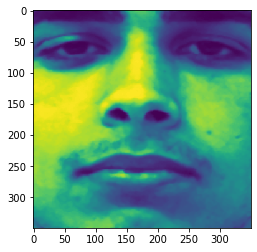

In [4]:
# Showing the image

test_image = prepare('facial_expressions/test/108a.jpg', 350)
plt.imshow(test_image[0])

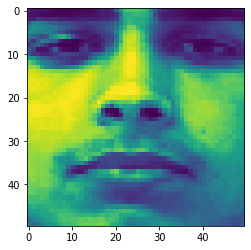

In [5]:
test_image = prepare('facial_expressions/test/108a.jpg', 50)
plt.imshow(test_image[0])

In [6]:
training_job_name = 'image-classification-personality-training-job-try-7'
job_info = boto3.client('sagemaker').describe_training_job(TrainingJobName=training_job_name)

In [7]:
#!tar -zxvf model_fm.tar.gz

In [8]:
#!mv params model_fm-0008.params

In [9]:
#!mv symbol.json model-symbol.json

In [10]:
import mxnet as mx
 
mx_model = mx.module.Module.load("./image-classification", 0, False, label_names=['out_label'])

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/mxnet/module/base_module.py:55: UserWarning: You created Module with Module(..., label_names=['out_label']) but input with name 'out_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
	softmax_label
  warnings.warn(msg)


In [11]:
def make_prediction_dense(model: mx.module, x_array: np.ndarray, batch_size: int=1):
 
    data_iter = mx.io.NDArrayIter(data=x_array, batch_size=batch_size)
 
    model.bind(data_shapes=data_iter.provide_data)
 
    prediction = model.predict(data_iter).asnumpy().flatten()
 
    return model, prediction

In [12]:
from PIL import Image
from numpy import asarray
# load the image
data = prepare('facial_expressions/test/176b.jpg', 350).reshape(1,1,350,350)

model, prediction = make_prediction_dense(mx_model, data)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/mxnet/module/base_module.py:67: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['out_label'])
  warnings.warn(msg)


In [13]:
mx.model

<module 'mxnet.model' from '/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/mxnet/model.py'>

In [14]:
prepare('facial_expressions/test/108a.jpg', 100).reshape(1,1,100,100)

array([[[[ 49,  22,  16, ...,  18,  23,  39],
         [ 18,  13,  14, ...,  14,  16,  16],
         [ 14,  14,  14, ...,   9,  11,  11],
         ...,
         [103,  94, 103, ...,  61,  70,  80],
         [104,  94,  90, ...,  62,  75,  81],
         [117, 105,  90, ...,  71,  78,  79]]]], dtype=uint8)

In [15]:
print(prediction)

[0.01588411 0.02627213 0.0095862  0.00152452 0.6244519  0.2966094
 0.02463412 0.00103768]


In [27]:
unique_emotions = ['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness', 'sadness', 'contempt']
unique_count = {'anger' : 0,
 'surprise' : 0,
 'disgust' : 0,
 'fear' : 0,
 'neutral' : 0,
 'happiness' : 0,
 'sadness' : 0,
 'contempt' : 0}
for test_file in os.listdir("./test_resize"):
    #print(test_file)
    data = prepare("./test_resize/" + test_file, 350).reshape(1, 1, 350, 350)
    model, prediction = make_prediction_dense(mx_model, data)
    prediction_list = prediction.tolist()
    max_value = max(prediction_list)
    maximum = -1
    for index in prediction_list:
        if (maximum < index):
            maximum = index
    unique_emotion = unique_emotions[prediction_list.index(maximum)]
    
    unique_count[unique_emotion] += 1

for key in unique_count.keys():
    print(key + ":" + str(unique_count[key]))

KeyboardInterrupt: 

In [21]:
unique_emotions = ['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness', 'sadness', 'contempt']
test_file = os.listdir("./test_resize")[1]
data = prepare("./test_resize/" + test_file, 350).reshape(1, 1, 350, 350)
model, prediction = make_prediction_dense(mx_model, data)
prediction_list = prediction.tolist()
max_value = max(prediction_list)
maximum = -1
for index in prediction_list:
    if (maximum < index):
        maximum = index
unique_emotion = unique_emotions[prediction_list.index(maximum)]

print(unique_emotion)



neutral


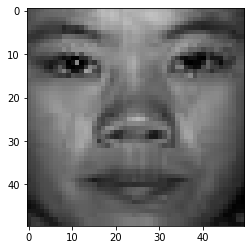

In [22]:
plt.imshow(cv2.imread("./test_resize/" + test_file))